In [1]:
import pandas as pd

In [2]:
data_frame = pd.read_csv('pimadataset.csv')
data_frame.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
data_frame.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data_frame.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
# slicing the data into input and output
x = data_frame.iloc[:, :8] # the first : shows that we are taking all the rows, the :8 shows that we are taking all the columns from 0 to 7
y = data_frame.iloc[:, 8] # the first : shows that we are taking all the rows, the 8 shows that we are taking the 8th column

In [23]:
# standardizing the input variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_input = scaler.fit_transform(x)
print(standardized_input[-5:]) # printing the last 5 rows of the standardized input

[[ 1.82781311 -0.62264204  0.35643175  1.72273472  0.87003069  0.1151693
  -0.90868214  2.5321362 ]
 [-0.54791859  0.03459802  0.04624525  0.40544544 -0.69289057  0.61015436
  -0.39828208 -0.53102292]
 [ 0.3429808   0.00330087  0.14964075  0.15453319  0.27959377 -0.73518964
  -0.68519336 -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 -1.28821221 -0.69289057 -0.24020459
  -0.37110101  1.17073215]
 [-0.84488505 -0.8730192   0.04624525  0.65635768 -0.69289057 -0.20212881
  -0.47378505 -0.87137393]]


In [27]:
# converting the standardized input into a data frame and saving it as a csv file
standardized_input_df = pd.DataFrame(standardized_input, columns = x.columns)
standardized_input_df.to_csv('standardized_input.csv', index = False)

In [29]:
# splitting the data into training and testing data using a 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(standardized_input, y, test_size = 0.3, random_state =0)

In [30]:
# creating a logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression().fit(x_train, y_train)


In [35]:
# checking the accuracy score of the model
from sklearn.metrics import accuracy_score
y_predict = logistic_model.predict(x_test)
score = accuracy_score(y_test, y_predict)
print("score of the model is: ", score)

score of the model is:  0.7792207792207793


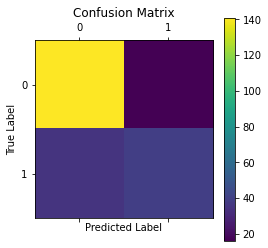

In [37]:
# visualizing the confusion matrix using matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
plt.matshow(cm) # the matshow function is used to plot the confusion matrix
plt.title('Confusion Matrix') # the title of the plot
plt.colorbar() # the color bar on the side of the plot to show the values
plt.ylabel('True Label') # the label for the y-axis
plt.xlabel('Predicted Label') # the label for the x-axis
plt.show() # the show is used to display the plot